┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                             ┃
┃            Ex_02            ┃
┃                             ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃  -Número de ciclos >        ┃
┃     - 8                     ┃
┃  -Amplitude média >         ┃
┃     - 13.7956               ┃
┃  -Periodo >                 ┃
┃     - 6.2826                ┃
┃  - A >                      ┃
┃     - 150.0                 ┃
┃                             ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛


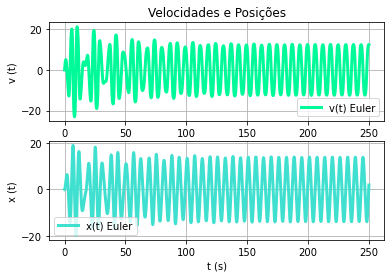

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def acelera(t, xx, vx):    
    return (- ( k * xx * (1 + 2 * a * xx**2) / m) - ( b * vx / m) + (F0 * np.cos(wF * t)))


# Gravidade
g = 9.8

# Massa
m = 1
k = 1
b = 0.05
a = 0.002
F0 = 7.5
wF = 1
w0 = 1

# Tempo inicial e final
ti = 0
tf = 250

# Velocidade terminal
vtx = 6.8

# Posição e Velocidade inicial
xx0 = 0
vx0 = 0

# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)

# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)

# Introduzir x0 e v0 nos vetores da posição e velocidade
xx[0] = xx0
vx[0] = vx0

# Soma das amplitudes máximas sao máximas (x[i-1] < x[i] > x[i-1])
amps = 0
# Array de tempos (o seu tamanho é o número de amplitudes máximas encontradas (para fazer a média))
nAmps = []

periodoArray = []


# Preencher os vetores x, v, a
for i in range(n):
    # Runge-Kutta
    #xxrk4[i + 1], vxrk4[i + 1] = rk4(t[i], xxrk4[i], vxrk4[i], dt)

    # Euler
    ax[i] = acelera(t[i], xx[i], vx[i])
    vx[i + 1] = vx[i] + ax[i] * dt
    xx[i + 1] = xx[i] + vx[i] * dt
              
    if (xx[i - 1] < xx[i]) and (xx[i] > xx[i + 1] and t[i] > 200):
        amps += xx[i]
        nAmps.append(t[i])

A = (F0 / m) / (np.sqrt((wF**2 - w0**2)**2 + (b * wF / m)**2))
        
for i in range(1, len(nAmps)):
    periodoArray.append(nAmps[i] - nAmps[i-1])
    
    
# Periodo = soma dos periodos / numero destes encontradas
periodo = sum(periodoArray) / len(periodoArray)
        
# Amplitude = soma das amplitudes / numero destas encontradas
amplitude = amps / len(nAmps)
    

print("┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓")
print("┃                             ┃")
print("┃            Ex_02            ┃")
print("┃                             ┃")
print("┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫")
print("┃  -Número de ciclos >        ┃")
print("┃     - %-8s              ┃" % len(nAmps))
print("┃  -Amplitude média >         ┃")
print("┃     - %-8s              ┃" % np.round(amplitude, 4))
print("┃  -Periodo >                 ┃")
print("┃     - %-8s              ┃" % np.round(periodo, 4))
print("┃  - A >                      ┃")
print("┃     - %-8s              ┃" % np.round(A, 4))
print("┃                             ┃")
print("┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛")


fig, axs = plt.subplots(2)

    
# Plot
axs[0].set_title('Velocidades e Posições')
axs[0].plot(t, vx, label="v(t) Euler",  linestyle='-', linewidth=3, color="mediumspringgreen")
axs[0].set(xlabel = "t (s)", ylabel = "v (t)")
axs[0].legend()         # Legenda só aparece com isto
axs[0].grid()

# Plot
axs[1].plot(t, xx, label="x(t) Euler",  linestyle='-', linewidth=3, color="turquoise")
axs[1].set(xlabel = "t (s)", ylabel = "x (t)")
axs[1].legend()         # Legenda só aparece com isto
axs[1].grid()
